# Dataset Definition

The data set, titled Students Performance in Exams, looks at test scores from public high school students. The data set included information about each students gender, race/ethnicity, parental level of education, lunch, test preparation course, math score,reading score, and writing score. Because we are looking at the parent’s effects on the child’s test performance, we used data about the parental level of education, lunch, and the student’s math, reading, and writing scores. The parental level of education was broken down into 6 different levels of obtained degrees. The lunch data refers to whether or not the student eats a free or reduced lunch, which we used to estimate general economic status of parents, as free/reduced lunch programs aim to help low income families.

# Solution

In [62]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [63]:
data1 = pd.read_csv("StudentsPerformance.csv")

In [64]:
data1.shape

(1000, 8)

In [65]:
data1.size

8000

In [66]:
data1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race/ethnicity               1000 non-null   object
 2   parental level of education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test preparation course      1000 non-null   object
 5   math score                   1000 non-null   int64 
 6   reading score                1000 non-null   int64 
 7   writing score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


In [67]:
data1.dtypes

gender                         object
race/ethnicity                 object
parental level of education    object
lunch                          object
test preparation course        object
math score                      int64
reading score                   int64
writing score                   int64
dtype: object

In [68]:
data1

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group C,some high school,free/reduced,none,0,17,10
1,female,group B,high school,free/reduced,none,8,24,23
2,female,group B,some high school,free/reduced,none,18,32,28
3,female,group B,some college,standard,none,11,38,32
4,female,group C,some college,free/reduced,none,22,39,33
...,...,...,...,...,...,...,...,...
995,male,group E,some college,standard,completed,99,87,81
996,male,group A,some college,standard,completed,100,96,86
997,male,group D,some college,standard,completed,100,97,99
998,male,group E,associate's degree,free/reduced,completed,100,100,93


In [69]:
data1.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group C,some high school,free/reduced,none,0,17,10
1,female,group B,high school,free/reduced,none,8,24,23
2,female,group B,some high school,free/reduced,none,18,32,28
3,female,group B,some college,standard,none,11,38,32
4,female,group C,some college,free/reduced,none,22,39,33


# 1. Find out how many males and females participated in the test.

In [70]:
data1['gender'].value_counts(dropna=False)

female    518
male      482
Name: gender, dtype: int64

In [71]:
male = data1['gender'].value_counts()["male"]
print("The number of male is",male)
female = data1['gender'].value_counts()["female"]
print("The number of female is",female)

The number of male is 482
The number of female is 518


# Insights

More females participated in the test than males.

# 2. What do you think about the students' parental level of education?

In [72]:
data1['parental level of education'].value_counts(dropna=False)

some college          226
associate's degree    222
high school           196
some high school      179
bachelor's degree     118
master's degree        59
Name: parental level of education, dtype: int64

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


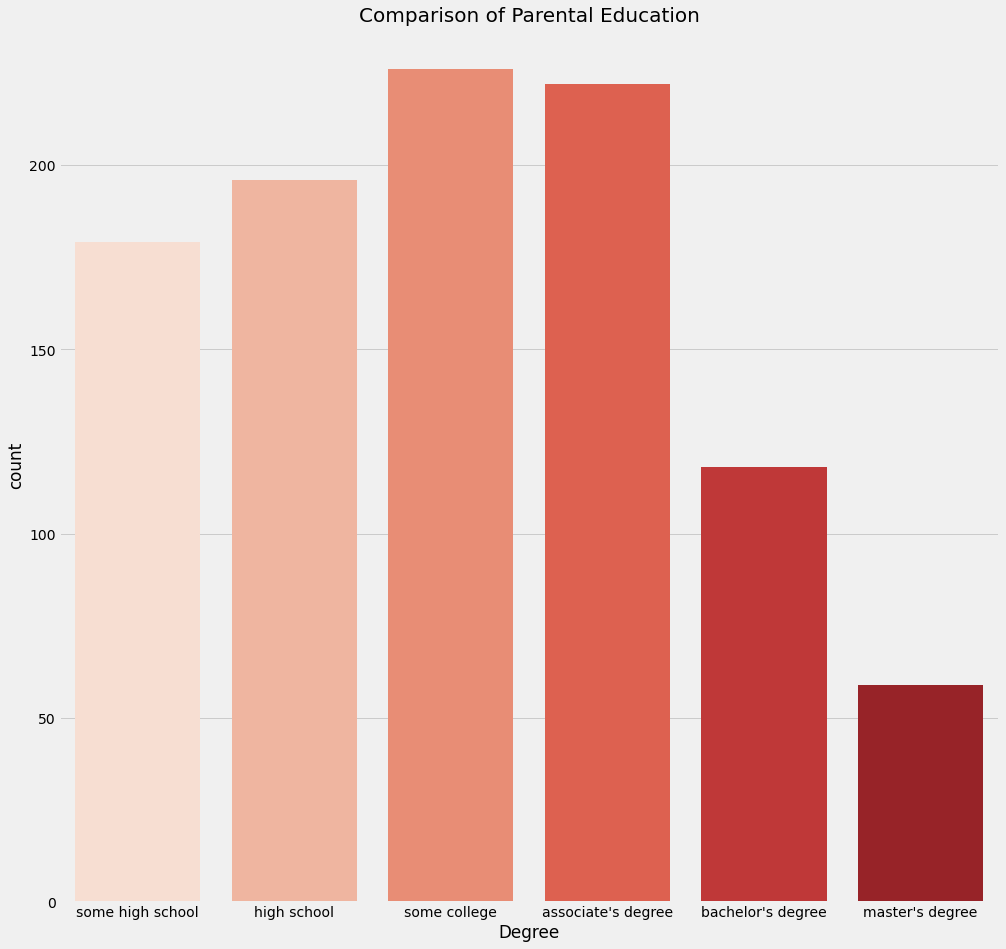

In [73]:
plt.rcParams['figure.figsize'] = (15,15 )
plt.style.use('fivethirtyeight')

sns.countplot(data1['parental level of education'], palette = 'Reds')
plt.title('Comparison of Parental Education', fontweight = 30, fontsize = 20)
plt.xlabel('Degree')
plt.ylabel('count')
plt.show()

# Insights

- There are six types of level of parental education
- Parents with education in some college is maximum, whereas there are very less parents have masters degree.
- A major portion of parents have education above highschool.

# 3. Who scores the most on average for math, reading and writing based on Gender and Test preparation course

In [74]:
d2 = data1[['test preparation course','gender','math score','writing score','reading score']].groupby(['test preparation course','gender']).agg('mean')
d2

math score  writing score  reading score
test preparation course gender                                          
completed               female   67.108696      78.793478      77.375000
                        male     72.988506      70.339080      70.793103
none                    female   61.320359      68.982036      69.955090
                        male     66.467532      59.551948      62.581169

# Insights

- The students completed test prepration course scored more average marks than who not completed the same in both genders.
- Among students who completed test prepration course female students have more average mark in writing and reading, whereas male students scored more im maths
- The trend is similar in the case of students who not completed test prepration course, here also female students have more average mark in writing and reading, whereas ale students scored more im maths

# 4. What do you think about the scoring variation for math, reading and writing based on Gender and Test preparation course.

In [75]:
data1.groupby(['test preparation course','gender']).agg(['min','median','max'])

math score             reading score         \
                                      min median  max           min median   
test preparation course gender                                               
completed               female         23   67.0   99            40   78.0   
                        male           39   74.0  100            37   72.0   
none                    female          0   62.0  100            17   71.0   
                        male           27   67.0   97            23   63.0   

                                    writing score              
                                max           min median  max  
test preparation course gender                                 
completed               female  100            36   79.0  100  
                        male    100            38   71.0  100  
none                    female  100            10   70.0  100  
                        male     96            15   60.0   92

# Insights

- Some among students participated in test preparation course have managed to score 99 or above. Means the test prepration course is effective.
- There are students who not attended test preparation course also managed to score more than 90 marks.
- Female students who doents completed test preparation course also managed to score maximum scores.
- Also the worst perfomer is also a female who not attended test preparation course who scored zero mark in maths.

# 5. The management needs your help to give bonus points to the top 25% of students based on their maths score, so how will you help the management to achieve this.

In [76]:
data2 = data1.sort_values("math score")
n = 25
data2.head(int(len(data1)*(n/100)))

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group C,some high school,free/reduced,none,0,17,10
1,female,group B,high school,free/reduced,none,8,24,23
3,female,group B,some college,standard,none,11,38,32
51,female,group C,some high school,free/reduced,none,13,41,51
2,female,group B,some high school,free/reduced,none,18,32,28
...,...,...,...,...,...,...,...,...
151,female,group D,associate's degree,free/reduced,none,56,65,63
152,female,group E,master's degree,free/reduced,none,56,72,65
162,female,group E,high school,free/reduced,completed,57,75,73
161,female,group E,high school,free/reduced,none,57,58,57


# Insights

The list above shows the details of students in the top 25% students, based on their maths score. who are eligible for bonus points.

# Conclusion

- The factors such as parental level of education, socioeconomic disadvantage, test preparation courses affect the students’ performances in the exams. But there are many exceptions as well. 
- There are students with a low parental level of education scoring full marks. Also, some students have not completed the test preparation course getting full marks. These students may have their own strategies for test preparations. Socioeconomic disadvantage also has many exceptions. These students did not allow economic obstacles to affect their efforts. So, many factors are affecting the students’ performances.